![Microsoft Film Venture](./images/project_banner.jpg)

# Microsoft Film Venture
## Flatiron School Data Science Phase 1 Project

# Introduction

### Initial Project Submision

**Student name**: [Rafael V Rabinovich](mailto:rafvrab@gmail.com)<br>
**Student pace**: Flex pace<br>
**Scheduled project review date/time**: 3/3/23 1:30pm EST<br>
**Instructor name**: Morgan Jones<br>
**Blog URL**: https://medium.com/@rafvrab

### Project Premise

Our team has been hired by Microsoft to assist them in gaining a better understanding of the movie industry. Specifically, we will be conducting data analysis to answer the question of which types of films are currently performing the best at the box office. Our findings will then be translated into useful insights for Microsoft's new movie studio to use when making decisions about which films to produce.


### Goals

Throughout this project, we will be evaluating films based on several different standards, such as:<ul> <li>Genre<li>Runtime<li>Release Date<li>Rating<li>Production Budget.<br></ul>
In our analysis, we will explore what the best measure is for movies with the highest ROI (return on invesment), as well as what else should be taken into account. Ultimately, our goal is to provide actionable insights that will inform the studio's future decision-making.

### Methodology

**Description of "this project"**

**Import Libraries**

- Bring ("import") the Python libraries needed to open and manipulate the data provided.

**Open and Read Database Files**

- Assign dataframe IDs to database files
- Open and perouse their content

**Data Cleaning**

**Initial Dataframe Merging**

**EDA on Question 1:** Visualisations and Data Manipulation to Answer Question

(will expand upon review of methods used below)

### Importing Libraries

In order to open, explore, visualize and understand the data needed for our task, we will begin by importing the Python language libraries that allow us to do all of this.

Pandas - abreviated "pd", is a data analysis library. We rely heavily on it to visualize data structures and to manipulate numerical tables.<br><br>
Numpy - apreviated "np", is a library use for working with arrays, and various mathematical uses.<br><br>
SQLite3 is a library that allows us to work with lightwight databases. <br><br>
ZIPfile is a library module used to open ZIP files. This we need to open larger database files.<br><br>
Gzip is a library module that, like ZIPfile, opens ZIP files. This is an alternative module we want to have. <br><br>
Random is a module used to generate random variables. I want this as a tool to explore my EDA tools without compromising actual data.  (I may not show its use here after I clean my work for presentation)<br><br>
MatPlotLib - abreviated "plt", is a comprehensive library used to create graph visualizations. <br><br>
Seaborn - abreviated "sns", is another data visualization library, based of MatPlotLib, which is used for drawing attractive statistical graphics.

If more libraries become necessary along the process of our work, we will import them as needed.

In [151]:
# Bringing in the libraries I will use for this project
import pandas as pd
import numpy as np
import sqlite3
import zipfile
import gzip
import random
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import seaborn as sns
import re
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Opening and Reading Database Files

Having imported the Python libraries we will use for the technical presentation, we will now look into the databases. This initial exploratory step will shine a light on the content of the data we were given.

As a first step, we use the "dir" command to list our data files and their size. 

In [152]:
# Let's see that the data is there
! dir Data

 Volume in drive C is Acer
 Volume Serial Number is B208-A089

 Directory of C:\Users\rafvr\Jupyter Notebooks\Microsoft_Film_Proposal\Data

07/05/2023  05:06 PM    <DIR>          .
07/17/2023  10:54 PM    <DIR>          ..
07/05/2023  03:15 PM            53,544 bom.movie_gross.csv.gz
07/17/2023  02:49 PM       169,443,328 im.db
07/05/2023  03:15 PM        67,149,708 im.db.zip
07/05/2023  03:15 PM           498,202 rt.movie_info.tsv.gz
07/05/2023  03:15 PM         3,402,194 rt.reviews.tsv.gz
07/05/2023  03:15 PM           827,840 tmdb.movies.csv.gz
07/05/2023  03:15 PM           153,218 tn.movie_budgets.csv.gz
               7 File(s)    241,528,034 bytes
               2 Dir(s)  931,297,705,984 bytes free


For the purpose of clarity, let us look at the relevant part of this information in tabular form:

|Data File             | Size (in bytes)|
|----------------------|----------------|
|bom.movie_gross.csv.gz|	53,544|
|im.db.zip|	67,149,708|
|rt.movie_info.tsv.gz|	498,202|
|rt.reviews.tsv.gz|	3,402,194|
|tmdb.movies.csv.gz|	827,840|
|tn.movie_budgets.csv.gz|	153,218|
|6 Files|  72,084,706 bytes|

Next we will open the IMDb data file. For this we will use the "conn" instruction and place our cursor there.  We are using SQLite.

We have 6 data files. The content of 'im.db' and 'im.db.zip' is the same. We did use an out-of-code method to unzip that large file. So we have actually 7 resources for our data.<br><br>
3 files are in .csv format, another 3 are in .tsv format, and one is in .db format. This information is relevant to how we will open and explore that data.<br><br>
We will now proceed to open them and look at their content.<br><br>
As we read the files, we will assign each to a 'df' (data frame) variable. This will allow us to work with data frames rather than with files of different formats.<br><br>

Let's go into the IMdB database, which is a collection of 8 SQL Tables.

In [153]:
zip_path = 'Data/im.db.zip'  # Path to the ZIP file

# Extract the contents of the ZIP file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('Data')  # Extract to the 'Data' folder


In [154]:
# Connecting to the IMDb Database
conn = sqlite3.connect('Data\im.db')  # connects to the file
cursor = conn.cursor() # places the cursor there

An SQL database file contains various tables of information. we want to reach into those tables, and then use Python to open and explore them. <br><br>
Let's proceed to read the tables list.

In [155]:
db_path = 'Data/im.db'  # Path to the SQLite database file

# Connect to the SQLite database
conn = sqlite3.connect(db_path)

# Create a cursor object to execute SQL queries
cursor = conn.cursor()

# Retrieve the table names
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

# Print the table names
for table in tables:
    print(table[0])

# Close the cursor and connection
# cursor.close() # <--- we don't want this closed yet
# conn.close() # <--- we don't want this closed yet


movie_basics
directors
known_for
movie_akas
movie_ratings
persons
principals
writers


There are 8 tables: movie_basics, directors, known_for, movie_akas, movie_ratings, persons, principals, and writers. Let's create dataframes with them.

In [156]:
movie_basics_df = pd.read_sql("""
SELECT *
FROM movie_basics
;""", conn)

directors_df = pd.read_sql("""
SELECT *
FROM directors
;""", conn)

known_for_df = pd.read_sql("""
SELECT *
FROM known_for
;""", conn)

movie_akas_df = pd.read_sql("""
SELECT *
FROM movie_akas
;""", conn)

movie_ratings_df = pd.read_sql("""
SELECT *
FROM movie_ratings
;""", conn)

persons_df = pd.read_sql("""
SELECT *
FROM persons
;""", conn)

principals_df = pd.read_sql("""
SELECT *
FROM principals
;""", conn)

writers_df = pd.read_sql("""
SELECT *
FROM writers
;""", conn)

# conn.close() <-- we'll kee it open for now

    movie_basics_df: Contains data from the movie_basics table.
    directors_df: Contains data from the directors table.
    known_for_df: Contains data from the known_for table.
    movie_akas_df: Contains data from the movie_akas table.
    movie_ratings_df: Contains data from the movie_ratings table.
    persons_df: Contains data from the persons table.
    principals_df: Contains data from the principals table.
    writers_df: Contains data from the writers table.

In [157]:
# assigning short df dataframes

sql = "SELECT * FROM movie_basics"
df_mb = pd.read_sql(sql, conn)

sql = "SELECT * FROM directors"
df_dir = pd.read_sql(sql, conn)

sql = "SELECT * FROM known_for"
df_kf = pd.read_sql(sql, conn)

sql = "SELECT * FROM movie_akas"
df_akas = pd.read_sql(sql, conn)

sql = "SELECT * FROM movie_ratings"
df_ratings = pd.read_sql(sql, conn)

sql = "SELECT * FROM persons"
df_persons = pd.read_sql(sql, conn)

sql = "SELECT * FROM principals"
df_principals = pd.read_sql(sql, conn)

sql = "SELECT * FROM writers"
df_writers = pd.read_sql(sql, conn)

Here's the list of dataframes and their corresponding tables:

    df_mb: Assigned to the movie_basics table.
    df_dir: Assigned to the directors table.
    df_kf: Assigned to the known_for table.
    df_akas: Assigned to the movie_akas table.
    df_ratings: Assigned to the movie_ratings table.
    df_persons: Assigned to the persons table.
    df_principals: Assigned to the principals table.
    df_writers: Assigned to the writers table.

Each dataframe corresponds to a specific table in the database, containing the data retrieved from those tables using SQL queries.

Let's now look at their shape, to see how many columns and lines does each table contain.

In [158]:
# Define a dictionary to store the table names and their corresponding dataframes
tables = {
    'movie_basics': df_mb,
    'directors': df_dir,
    'known_for': df_kf,
    'movie_akas': df_akas,
    'movie_ratings': df_ratings,
    'persons': df_persons,
    'principals': df_principals,
    'writers': df_writers
}

# Iterate over the tables and print the table name and shape
for table_name, dataframe in tables.items():
    print(f"Table: {table_name}")
    print(f"Shape: {dataframe.shape}")
    print()

Table: movie_basics
Shape: (146144, 6)

Table: directors
Shape: (291174, 2)

Table: known_for
Shape: (1638260, 2)

Table: movie_akas
Shape: (331703, 8)

Table: movie_ratings
Shape: (73856, 3)

Table: persons
Shape: (606648, 5)

Table: principals
Shape: (1028186, 6)

Table: writers
Shape: (255873, 2)



Here is the information in tabular form:

| Table Name    | Rows       | Columns |
|---------------|------------|---------|
| movie_basics  | 146144     | 6       |
| directors     | 291174     | 2       |
| known_for     | 1638260    | 2       |
| movie_akas    | 331703     | 8       |
| movie_ratings | 73856      | 3       |
| persons       | 606648     | 5       |
| principals    | 1028186    | 6       |
| writers       | 255873     | 2       |

In this updated version, the shape is divided into two columns, "Rows" and "Columns," providing a clearer breakdown of the dimensions for each table.

Let's now explore these tables and see what are their contents

In [159]:
# Iterate over the tables and print the table name and head of each dataframe
for table_name, dataframe in tables.items():
    print(f"Table: {table_name}")
    print(dataframe.head())
    print()


Table: movie_basics
    movie_id                    primary_title              original_title  \
0  tt0063540                        Sunghursh                   Sunghursh   
1  tt0066787  One Day Before the Rainy Season             Ashad Ka Ek Din   
2  tt0069049       The Other Side of the Wind  The Other Side of the Wind   
3  tt0069204                  Sabse Bada Sukh             Sabse Bada Sukh   
4  tt0100275         The Wandering Soap Opera       La Telenovela Errante   

   start_year  runtime_minutes                genres  
0        2013            175.0    Action,Crime,Drama  
1        2019            114.0       Biography,Drama  
2        2018            122.0                 Drama  
3        2018              NaN          Comedy,Drama  
4        2017             80.0  Comedy,Drama,Fantasy  

Table: directors
    movie_id  person_id
0  tt0285252  nm0899854
1  tt0462036  nm1940585
2  tt0835418  nm0151540
3  tt0835418  nm0151540
4  tt0878654  nm0089502

Table: known_for
   pers

Now I want to see the column titles of each table. Bare with me, I'm going somewhere with this exploration.

In [160]:
# Iterate over the tables and print the table name and column titles of each dataframe
for table_name, dataframe in tables.items():
    print(f"Table: {table_name}")
    print(f"Columns: {list(dataframe.columns)}")
    print()

Table: movie_basics
Columns: ['movie_id', 'primary_title', 'original_title', 'start_year', 'runtime_minutes', 'genres']

Table: directors
Columns: ['movie_id', 'person_id']

Table: known_for
Columns: ['person_id', 'movie_id']

Table: movie_akas
Columns: ['movie_id', 'ordering', 'title', 'region', 'language', 'types', 'attributes', 'is_original_title']

Table: movie_ratings
Columns: ['movie_id', 'averagerating', 'numvotes']

Table: persons
Columns: ['person_id', 'primary_name', 'birth_year', 'death_year', 'primary_profession']

Table: principals
Columns: ['movie_id', 'ordering', 'person_id', 'category', 'job', 'characters']

Table: writers
Columns: ['movie_id', 'person_id']



Here's the arranged information in a tabular format:

| Table Name    | Column Titles                                                     |
|---------------|------------------------------------------------------------------|
| movie_basics  | movie_id, primary_title, original_title, start_year, runtime_minutes, genres |
| directors     | movie_id, person_id                                               |
| known_for     | person_id, movie_id                                               |
| movie_akas    | movie_id, ordering, title, region, language, types, attributes, is_original_title |
| movie_ratings | movie_id, averagerating, numvotes                                 |
| persons       | person_id, primary_name, birth_year, death_year, primary_profession |
| principals    | movie_id, ordering, person_id, category, job, characters          |
| writers       | movie_id, person_id                                               |


This table provides a clearer representation with each column title listed as a separate column, making it easier to compare the tables and their respective columns. Here "movie_id" and "person_id" listed in the first two columns, and other column titles shifted to the right. Thus we learn what the tables are comparing, and how to put them together if needed for further exploratory analysis.

| Table Name    | Column 1   | Column 2   | Column 3         | Column 4          | Column 5         | Column 6        | Column 7           | Column 8           |
|---------------|------------|------------|-----------------|------------------|------------------|-----------------|--------------------|--------------------|
| movie_basics  | movie_id   |            | primary_title    | original_title   | start_year       | runtime_minutes  | genres             |                    |
| directors     | movie_id   | person_id  |                 |                  |                  |                 |                    |                    |
| known_for     | movie_id  | person_id   |                 |                  |                  |                 |                    |                    |
| movie_akas    | movie_id   |            | ordering         | title            | region           | language        | types              | attributes         |
| movie_ratings | movie_id   |            | averagerating    | numvotes         |                  |                 |                    |                    |
| persons       |            | person_id  | primary_name     | birth_year       | death_year       | primary_profession |                    |                    |
| principals    | movie_id   | person_id   | ordering         | category         | job             | characters         |                    |                    |
| writers       | movie_id   | person_id  |                 |                  |                  |                 |                    |                    |


This is another reference table with the IDs of directors and the film they are best known for. The table is 1,638,260 rows long. As in the case of other reference tables, this will only serve as a connector between tables or data files with lists of directors and other data files or tables with lists of movies. We may or may not chose to merge such files.

Let's now look at movie_akas.

The movie_akas table has 331,703 rows, and 8 columns of information: 
movie_id, ordering, title, region, language, types, attributes, and is_original_title
I am not sure what "ordering" means. The title is in the original language. The 'region' column provides two or three letters identifying the country where the film was produced. The 'language' column seems to be missing a lot of information, placing 'None' in most cases, or giving the film language in a two-letter code. The 'type' column tells us whether the film is in IMDb Display or not. The 'attributes' column mentions special attributes, such as 'short title' or '3-D version', otherwise leaves the field as 'None'. Finally, the 'is_original_title' column seems to identify an original title as '0.0'.

Let's now look at the 'movie_ratings' table:

The 'movie_ratings' table contains 73,856 rows of data and three columns: 'movie_id', 'averagerating', and 'numvotes'. This information will be useful when asking to list films by how popular, how liked, these are. But since we have a 'movie_id' instead of a title, we will have to merge with table to one that contains title information in order to make sense of the data.

We proceed now to open the 'persons' table, assigning it the 'df_persons variable':

What type of data is in the 'birth_year' column?

In [161]:
# Access the birth_year column in df_persons
birth_year_col = df_persons['birth_year']

# Get the data type of the birth_year column
data_type = birth_year_col.dtype

print("Data type of birth_year column:", data_type)

Data type of birth_year column: float64


The 'persons' table is a "who is who" listing of people in the movie industry. It lists the names of actors, actresses, directors, producers, cinematographers, cameramen, writes, producers, editors and other people. It assigns each person in the list an ID.  It also contains birth and death year information, but most of that data is missing, being expressed only as "NaN". 

Next, we open the 'principals' table:

This is another 'who is who in the movie industry' listing. It has six columns: 'movie_id', 'ordering', 'person_id', 'category', 'job', and 'characters'.  It matches the film and the person by ID, and if we merge this table with other tables where is information is found, we will be able to make sense out of this information.  We have a wooping 1,028,186 rows of information, making this a very robust listing.  The 'job' and 'character' columns are missing some of the data.

Next, we take a look at the 'writers' table:

This is another listing of IDs, associating 'movie_id' to 'person_id'. But only those 2 columns. This information requires merging of tables to be interpreted in a meaningful manner. The table contains 255,873 rows of information.

-----------

Let's read and assign dataframes to the other tables:

In [162]:
df_mg = pd.read_csv('Data/bom.movie_gross.csv.gz')

file_path = 'Data/rt.movie_info.tsv.gz'
df_rt_mi = pd.read_csv(file_path, sep='\t')

file_path = 'Data/rt.reviews.tsv.gz'
with gzip.open(file_path, 'rb') as f:
    file_content = f.read()
db_reviews = pd.read_csv(file_path, sep='\t', encoding='ISO-8859-1')

file_path = 'Data/tmdb.movies.csv.gz'
db_movies = pd.read_csv(file_path, compression='gzip')

file_path = 'Data/tn.movie_budgets.csv.gz'
db_movie_budgets = pd.read_csv(file_path, compression='gzip')


Now let's see their shape

In [163]:
# Display the shape of each dataframe
dataframes = {
    'df_mg': df_mg,
    'df_rt_mi': df_rt_mi,
    'db_reviews': db_reviews,
    'db_movies': db_movies,
    'db_movie_budgets': db_movie_budgets
}

for dataframe_name, dataframe in dataframes.items():
    print(f"Dataframe: {dataframe_name}")
    print(f"Shape: {dataframe.shape}")
    print()

Dataframe: df_mg
Shape: (3387, 5)

Dataframe: df_rt_mi
Shape: (1560, 12)

Dataframe: db_reviews
Shape: (54432, 8)

Dataframe: db_movies
Shape: (26517, 10)

Dataframe: db_movie_budgets
Shape: (5782, 6)



Here is the results of the dataframe shapes in tabular form:

| Dataframe         | Rows   | Columns |
|-------------------|--------|---------|
| df_mg             | 3387   | 5       |
| df_rt_mi          | 1560   | 12      |
| db_reviews        | 54432  | 8       |
| db_movies         | 26517  | 10      |
| db_movie_budgets  | 5782   | 6       |


Now let's explore their contents:

In [164]:
# Display the head of each dataframe
dataframes = {
    'df_mg': df_mg,
    'df_rt_mi': df_rt_mi,
    'db_reviews': db_reviews,
    'db_movies': db_movies,
    'db_movie_budgets': db_movie_budgets
}

for dataframe_name, dataframe in dataframes.items():
    print(f"Dataframe: {dataframe_name}")
    print(dataframe.head())
    print()

Dataframe: df_mg
                                         title studio  domestic_gross  \
0                                  Toy Story 3     BV     415000000.0   
1                   Alice in Wonderland (2010)     BV     334200000.0   
2  Harry Potter and the Deathly Hallows Part 1     WB     296000000.0   
3                                    Inception     WB     292600000.0   
4                          Shrek Forever After   P/DW     238700000.0   

  foreign_gross  year  
0     652000000  2010  
1     691300000  2010  
2     664300000  2010  
3     535700000  2010  
4     513900000  2010  

Dataframe: df_rt_mi
   id                                           synopsis rating  \
0   1  This gritty, fast-paced, and innovative police...      R   
1   3  New York City, not-too-distant-future: Eric Pa...      R   
2   5  Illeana Douglas delivers a superb performance ...      R   
3   6  Michael Douglas runs afoul of a treacherous su...      R   
4   7                                       

Now let's see the column titles

In [165]:
for dataframe_name, dataframe in dataframes.items():
    print(f"Dataframe: {dataframe_name}")
    print(f"Columns: {list(dataframe.columns)}")
    print()

Dataframe: df_mg
Columns: ['title', 'studio', 'domestic_gross', 'foreign_gross', 'year']

Dataframe: df_rt_mi
Columns: ['id', 'synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date', 'dvd_date', 'currency', 'box_office', 'runtime', 'studio']

Dataframe: db_reviews
Columns: ['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher', 'date']

Dataframe: db_movies
Columns: ['Unnamed: 0', 'genre_ids', 'id', 'original_language', 'original_title', 'popularity', 'release_date', 'title', 'vote_average', 'vote_count']

Dataframe: db_movie_budgets
Columns: ['id', 'release_date', 'movie', 'production_budget', 'domestic_gross', 'worldwide_gross']



### Recap of Dataframe Contents

We have opened all the database files and tables. Let's recap. Here are our database files, their size, shape, columns, and the df ID we've assiged to them:

Data File	|	Size (in bytes)	|	Shape	|	Columns	|	Data Frame ID
---------------|----------------|-----------|-----------|--------------------------------------
bom.movie_gross.csv.gz	|	53,544	|	3387, 5	|	title, studio, domestic_gross, foreign_gross, year	|	df_mg
im.db	|	169,443,328	|	8 tables	|	* see below	|	df_1
rt.movie_info.tsv	|	1,184,685	|	156, 12 	|	id, synopsis, rating, genre, director, writer, theater_date, dvd_date, currency, box_office, runtime, studio	|	db_rt_mi
rt.reviews.tsv.gz	|	3,402,194	|	54432, 8 	|	id, review, rating, fresh, critic, top_critic, publisher, date	|	db_reviews
tmdb.movies.csv.gz	|	827,840	|	26517, 10 	|	Unnamed: 0, genre_ids, id, original_language, original_title, popularity, release_date, title, vote_average, vote_count	|	db_movies
tn.movie_budgets.csv.gz	|	153,218	|	5782, 6 	|	id, release_date, movie, production_budget, domestic_gross, worldwide_gross	|	db_movie_budgets


In the 'Shape' column we learn how many rows, and after the comma how many columns a file has. IMDb cointains eight tables, so we work is separatedly. 

Here are the tables of the im.db (IMDb) database file:

| Table ID | Name           | Shape        | Columns                                                                   | Data Frame ID |
|----------|----------------|--------------|---------------------------------------------------------------------------|---------------|
| 0        | movie_basics   | 146144, 6    | movie_id, primary_title, original_title, start_year, runtime_minutes, genres | df_mb         |
| 1        | directors      | 291174, 2    | movie_id, person_id                                                       | df_dir        |
| 2        | known_for      | 1638260, 2   | person_id, movie_id                                                       | df_kf         |
| 3        | movie_akas     | 331703, 8    | movie_id, ordering, title, region, language, types, attributes, is_original_title | df_akas   |
| 4        | movie_ratings  | 73856, 3     | movie_id, averagerating, numvotes                                          | df_ratings    |
| 5        | persons        | 606648, 5    | person_id, primary_name, birth_year, death_year, primary_profession        | df_persons    |
| 6        | principals     | 1028186, 6   | movie_id, ordering, person_id, category, job, characters                   | df_principals |
| 7        | writers        | 255873, 2    | movie_id, person_id                                                       | df_writers    |

We see that 'directors' (df_dir), 'known_for' (df_kf), and 'writers' (df_writers) are two-column tables, with only IDs on them, that will only serve to reference the merger of other tables.

### Initial Dataframe Mergers

At this poing, judging by the information gathered above, we are going to merge two tables: 'movie_basics' with 'movie_ratings'.  This will give us information on movie titles, genre, year the film was launched, runtime, rating and how many votes each film got. This information should be enough for the questions we want to ask.

Let's now combine those two tables from the IMDb into a single dataframe. This will make it easier to work with all that data.  We will create a new dataframe, 'df_im_mgd'.  We will use Python Pandas to do this merger.

In [166]:
# merge 'movie_basics' with 'movie_ratings'
# we're performing a "left" merger
df_im_mgd = pd.merge(df_mb, df_ratings, on='movie_id', how='left')


Let's now take alook at our merged dataframe

In [167]:
df_im_mgd

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
...,...,...,...,...,...,...,...,...
146139,tt9916538,Kuambil Lagi Hatiku,Kuambil Lagi Hatiku,2019,123.0,Drama,NaN,NaN
146140,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,NaN,Documentary,NaN,NaN
146141,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,NaN,Comedy,NaN,NaN
146142,tt9916730,6 Gunn,6 Gunn,2017,116.0,None,NaN,NaN


What are the genres listed here?

In [168]:
unique_genres = df_im_mgd['genres'].unique().tolist()

In [169]:
unique_genres = df_im_mgd['genres'].unique().tolist()
genre_count = len(unique_genres)
print("Number of unique genres:", genre_count)

Number of unique genres: 1086


As it turns out, "unique_genres" renders a list of 907 genres. This is due to the combinations of two or more genres per film. 

In [170]:
# counting the most popular genres
top_genres = df_im_mgd['genres'].value_counts().head(25).index.tolist()
print(top_genres)

['Documentary', 'Drama', 'Comedy', 'Horror', 'Comedy,Drama', 'Thriller', 'Action', 'Biography,Documentary', 'Drama,Romance', 'Comedy,Drama,Romance', 'Documentary,Drama', 'Comedy,Romance', 'Romance', 'Documentary,Music', 'Drama,Thriller', 'Documentary,History', 'Horror,Thriller', 'Biography,Documentary,History', 'Biography,Documentary,Drama', 'Family', 'Animation', 'Drama,Family', 'Action,Crime,Drama', 'Comedy,Horror', 'Crime,Drama']


In [171]:
# What are the single genre categories? 
genre_list = df_im_mgd['genres'].str.split(',').explode().str.strip().unique().tolist()
print(genre_list)

['Action', 'Crime', 'Drama', 'Biography', 'Comedy', 'Fantasy', 'Horror', 'Thriller', 'Adventure', 'Animation', 'Documentary', 'History', None, 'Mystery', 'Sci-Fi', 'Romance', 'Family', 'War', 'Music', 'Sport', 'Western', 'Musical', 'Adult', 'News', 'Talk-Show', 'Reality-TV', 'Game-Show', 'Short']


In [172]:
# How many genres are there?
genre_count2 = len(genre_list)
print(genre_count2)

28


# Table Merger

Now we will merge db_movie_budgets, were we see the cost of producing each film, with df_mg, were we see the revenue from each film.  This will allow us to calculate profit and ROI (return on investment):

In [173]:
df_finance = pd.merge(df_mg, db_movie_budgets, left_on='title', right_on='movie', how='inner')

# now let's take a look
df_finance

,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"
...,...,...,...,...,...,...,...,...,...,...,...
1242,Gotti,VE,4300000.0,NaN,2018,64,"Jun 15, 2018",Gotti,"$10,000,000","$4,286,367","$6,089,100"
1243,Ben is Back,RAtt.,3700000.0,NaN,2018,95,"Dec 7, 2018",Ben is Back,"$13,000,000","$3,703,182","$9,633,111"
1244,Bilal: A New Breed of Hero,VE,491000.0,1700000,2018,100,"Feb 2, 2018",Bilal: A New Breed of Hero,"$30,000,000","$490,973","$648,599"
1245,Mandy,RLJ,1200000.0,NaN,2018,71,"Sep 14, 2018",Mandy,"$6,000,000","$1,214,525","$1,427,656"


Let's calculate ROI and profit with these formulae:

ROI = (Gross Revenue / Budget) * 100 <br>
Profit = Gross Revenue - Budget


In [174]:
df_finance['worldwide_gross'] = df_finance['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)
df_finance['production_budget'] = df_finance['production_budget'].str.replace(',', '').str.replace('$', '').astype(float)

df_finance['ROI'] = (df_finance['worldwide_gross'] / df_finance['production_budget']) * 100
df_finance['real_profit'] = df_finance['worldwide_gross'] - df_finance['production_budget']

df_finance.head()

C:\Users\rafvr\AppData\Local\Temp\ipykernel_28312\2333211830.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_finance['worldwide_gross'] = df_finance['worldwide_gross'].str.replace(',', '').str.replace('$', '').astype(float)
C:\Users\rafvr\AppData\Local\Temp\ipykernel_28312\2333211830.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_finance['production_budget'] = df_finance['production_budget'].str.replace(',', '').str.replace('$', '').astype(float)


,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,ROI,real_profit
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,200000000.0,"$415,004,880",1.068880e+09,534.439761,868879522.0
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,160000000.0,"$292,576,195",8.355246e+08,522.202901,675524642.0
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,165000000.0,"$238,736,787",7.562447e+08,458.330105,591244673.0
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,68000000.0,"$300,531,751",7.061028e+08,1038.386512,638102828.0
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,170000000.0,"$312,433,331",6.211564e+08,365.386111,451156389.0


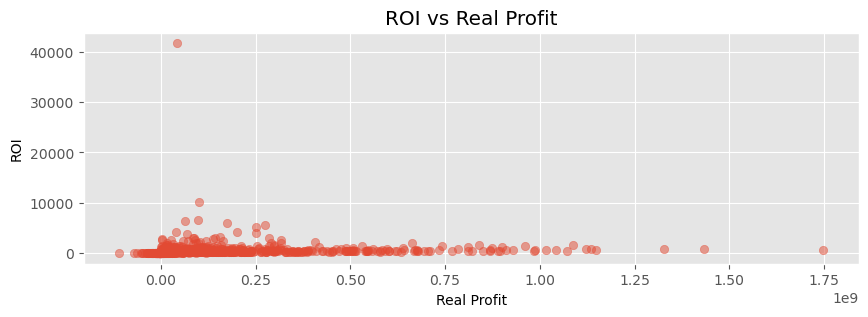

In [227]:
plt.figure(figsize=(10, 3))
plt.scatter(df_finance['real_profit'], df_finance['ROI'], alpha=0.5)
plt.xlabel('Real Profit')
plt.ylabel('ROI')
plt.title('ROI vs Real Profit')
plt.show()

Let's get rid of the outlier and show

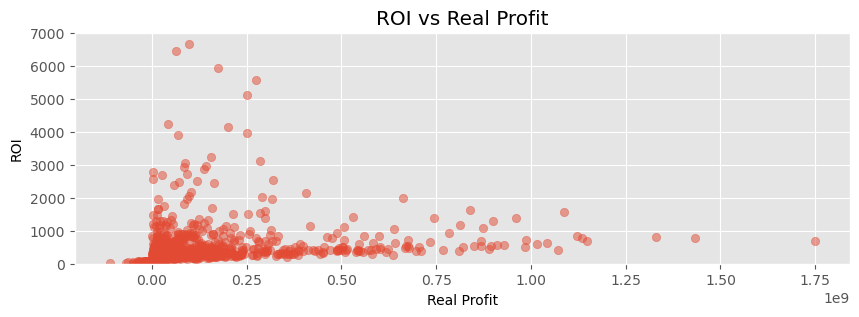

In [235]:
plt.figure(figsize=(10, 3))
plt.scatter(df_finance['real_profit'], df_finance['ROI'], alpha=0.5)
plt.xlabel('Real Profit')
plt.ylabel('ROI')
plt.title('ROI vs Real Profit')
plt.ylim(0, 7000)
plt.show()

We can see that ROI (Return on Investment) and Profit are not necessarily the same. Even those cluster around Zero, in many cases they expand through the graph plot. This suggests that we should assess each one separatedly.

In [177]:
# Retrieve the 25 greatest ROI movies
top_roi_movies = df_finance.nlargest(25, 'ROI')
print("Top 25 Greatest ROI Movies:")
print(top_roi_movies[['title', 'ROI']])

# Retrieve the 25 greatest profit movies
top_profit_movies = df_finance.nlargest(25, 'real_profit')
print("\nTop 25 Greatest Profit Movies:")
print(top_profit_movies[['title', 'real_profit']])


Top 25 Greatest ROI Movies:
                      title           ROI
850             The Gallows  41656.474000
407        The Devil Inside  10175.949000
245               Insidious   6658.059067
831              Unfriended   6436.419800
33    Paranormal Activity 2   5917.067733
1075                  Split   5579.296120
1077                Get Out   5107.359020
438       Chernobyl Diaries   4241.172100
212   Paranormal Activity 3   4140.796880
662               Annabelle   3951.737231
70        The Last Exorcism   3898.105556
537     Insidious Chapter 2   3238.430300
933                  Dangal   3101.627558
559               The Purge   3042.219367
951              Lights Out   2976.130200
415                Sinister   2924.260233
392   Paranormal Activity 4   2856.359840
1147          A Ghost Story   2769.782000
1193          Truth or Dare   2717.924114
606             You're Next   2688.717700
482    Your Sister's Sister   2575.494167
11               Black Swan   2548.205462
1098  

### Data Cleaning

It is very important to work with clean data, eliminate duplicates, and have things in proper order. We will now proceed to clean and organize our two merged dataframes, before we merge them together. We will the be able to ask the proper questions, and visualize our answers.

We will beging clearing out rows that are missing runtime, average rating, and number of votes information. We will use the dropna() method in Pandas to drop any rows that contain NaN values in the specified columns. 

In [178]:
# Drop any rows where any of the columns 'runtime_minutes', 'averagerating', or 'numvotes' contain NaN values. 
# The inplace=True argument modifies the original DataFrame instead of returning a new one.
df_im_mgd.dropna(subset=['runtime_minutes', 'averagerating', 'numvotes'], inplace=True)
df_im_mgd

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77.0
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
7,tt0137204,Joe Finds Grace,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy",8.1,263.0
...,...,...,...,...,...,...,...,...
146113,tt9911774,Padmavyuhathile Abhimanyu,Padmavyuhathile Abhimanyu,2019,130.0,Drama,8.4,365.0
146114,tt9913056,Swarm Season,Swarm Season,2019,86.0,Documentary,6.2,5.0
146115,tt9913084,Diabolik sono io,Diabolik sono io,2019,75.0,Documentary,6.2,6.0
146122,tt9914286,Sokagin Çocuklari,Sokagin Çocuklari,2019,98.0,"Drama,Family",8.7,136.0


Now lets create a dataframe with any cases in which 'primary_title' and 'original_title' are different. This will let us know if we can eliminate one of the two columns.

In [179]:
df_diff_titles = df_im_mgd.loc[df_im_mgd['primary_title'] != df_im_mgd['original_title']]
df_diff_titles.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43.0
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119.0
11,tt0154039,So Much for Justice!,Oda az igazság,2010,100.0,History,4.6,64.0
13,tt0162942,Children of the Green Dragon,A zöld sárkány gyermekei,2010,89.0,Drama,6.9,120.0
15,tt0176694,The Tragedy of Man,Az ember tragédiája,2011,160.0,"Animation,Drama,History",7.8,584.0


In [180]:
df_diff_titles.shape

(11514, 8)

How do Average Rating a Number of Votes related to each other?

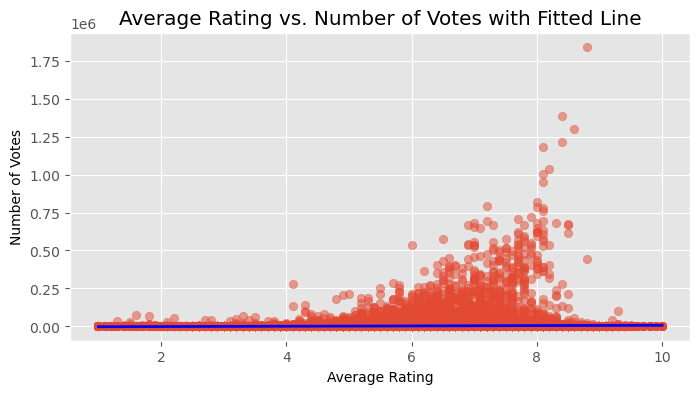

In [247]:
# Fit a polynomial regression line
coefficients = np.polyfit(df_im_mgd['averagerating'], df_im_mgd['numvotes'], 1)
polynomial = np.poly1d(coefficients)
x = np.linspace(df_im_mgd['averagerating'].min(), df_im_mgd['averagerating'].max(), 100)
y = polynomial(x)

plt.figure(figsize=(8, 4))
plt.scatter(df_im_mgd['averagerating'], df_im_mgd['numvotes'], alpha=0.5)
plt.plot(x, y, color='blue', linewidth=2)
plt.xlabel('Average Rating')
plt.ylabel('Number of Votes')
plt.title('Average Rating vs. Number of Votes with Fitted Line')
plt.show()

Average rating is greater when there are more votes per movie - I assume this means that more people go to watch the most popular movies, and give them a better rating. But the correlation isn't perfect. 

# Another DF Merger

In [182]:
# Merge movie_basics and movie_ratings on movie_id

movie_bas_rat = pd.merge(movie_basics_df, 
                        movie_ratings_df, 
                        on=['movie_id'], 
                        how='inner')

In [183]:
movie_bas_rat.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [184]:
movie_bas_rat['primary_title'].nunique()

69993

In [185]:
movie_bas_rat['original_title'].nunique()

71097

In [186]:
movie_bas_rat.shape

(73856, 8)

In [187]:
movie_bas_rat['movie_id'].nunique()

73856

In [188]:
df_finance.shape

(1247, 13)

# Eliminate duplicate columns

In [189]:
# eliminate duplicate columns
movie_bas_rat.drop_duplicates(['primary_title'], inplace=True)

In [190]:
movie_bas_rat.shape 

(69993, 8)

In [191]:
# eliminate duplicate columns
df_finance.drop_duplicates(['movie'], inplace=True)

In [192]:
df_finance.shape

(1238, 13)

# Merging Dataset ( movie_bas_rat & df_finance)

In [193]:
# Merge movie_bas_rat and tn_movie on primary_title & movie
mov_bas_rat2 = pd.merge(movie_bas_rat, 
                        df_finance, 
                        left_on=['primary_title'], 
                        right_on= ['movie'],
                        how='inner')

In [194]:
mov_bas_rat2

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,...,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,ROI,real_profit
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,...,8000000,2012,17,"Mar 22, 2013",On the Road,25000000.0,"$720,828",9.313302e+06,37.253208,-1.568670e+07
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,...,129900000,2013,37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000.0,"$58,236,838",1.878612e+08,206.440860,9.686118e+07
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,...,26900000,2014,67,"Sep 19, 2014",A Walk Among the Tombstones,28000000.0,"$26,017,685",6.210859e+07,221.816382,3.410859e+07
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,...,"1,019.4",2015,34,"Jun 12, 2015",Jurassic World,215000000.0,"$652,270,625",1.648855e+09,766.909239,1.433855e+09
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,The Rum Diary,FD,...,10800000,2011,16,"Oct 28, 2011",The Rum Diary,45000000.0,"$13,109,815",2.154473e+07,47.877182,-2.345527e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1152,tt7334528,Uncle Drew,Uncle Drew,2018,103.0,"Comedy,Sport",5.7,9739,Uncle Drew,LG/S,...,4200000,2018,85,"Jun 29, 2018",Uncle Drew,18000000.0,"$42,469,946",4.652716e+07,258.484228,2.852716e+07
1153,tt7349662,BlacKkKlansman,BlacKkKlansman,2018,135.0,"Biography,Crime,Drama",7.5,149005,BlacKkKlansman,Focus,...,44000000,2018,21,"Aug 10, 2018",BlacKkKlansman,15000000.0,"$49,275,340",9.301734e+07,620.115567,7.801734e+07
1154,tt7388562,"Paul, Apostle of Christ","Paul, Apostle of Christ",2018,108.0,"Adventure,Biography,Drama",6.7,5662,"Paul, Apostle of Christ",Affirm,...,5500000,2018,95,"Mar 23, 2018","Paul, Apostle of Christ",5000000.0,"$17,547,999",2.552950e+07,510.589960,2.052950e+07
1155,tt7401588,Instant Family,Instant Family,2018,118.0,"Comedy,Drama",7.4,46728,Instant Family,Par.,...,53200000,2018,20,"Nov 16, 2018",Instant Family,48000000.0,"$67,363,237",1.197362e+08,249.450392,7.173619e+07


In [195]:
mov_bas_rat2.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,title,studio,...,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,ROI,real_profit
0,tt0337692,On the Road,On the Road,2012,124.0,"Adventure,Drama,Romance",6.1,37886,On the Road,IFC,...,8000000,2012,17,"Mar 22, 2013",On the Road,25000000.0,"$720,828",9.313302e+06,37.253208,-1.568670e+07
1,tt0359950,The Secret Life of Walter Mitty,The Secret Life of Walter Mitty,2013,114.0,"Adventure,Comedy,Drama",7.3,275300,The Secret Life of Walter Mitty,Fox,...,129900000,2013,37,"Dec 25, 2013",The Secret Life of Walter Mitty,91000000.0,"$58,236,838",1.878612e+08,206.440860,9.686118e+07
2,tt0365907,A Walk Among the Tombstones,A Walk Among the Tombstones,2014,114.0,"Action,Crime,Drama",6.5,105116,A Walk Among the Tombstones,Uni.,...,26900000,2014,67,"Sep 19, 2014",A Walk Among the Tombstones,28000000.0,"$26,017,685",6.210859e+07,221.816382,3.410859e+07
3,tt0369610,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,Jurassic World,Uni.,...,"1,019.4",2015,34,"Jun 12, 2015",Jurassic World,215000000.0,"$652,270,625",1.648855e+09,766.909239,1.433855e+09
4,tt0376136,The Rum Diary,The Rum Diary,2011,119.0,"Comedy,Drama",6.2,94787,The Rum Diary,FD,...,10800000,2011,16,"Oct 28, 2011",The Rum Diary,45000000.0,"$13,109,815",2.154473e+07,47.877182,-2.345527e+07


In [196]:
mov_bas_rat2.shape

(1157, 21)

In [197]:
mov_bas_rat2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1157 entries, 0 to 1156
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           1157 non-null   object 
 1   primary_title      1157 non-null   object 
 2   original_title     1157 non-null   object 
 3   start_year         1157 non-null   int64  
 4   runtime_minutes    1148 non-null   float64
 5   genres             1156 non-null   object 
 6   averagerating      1157 non-null   float64
 7   numvotes           1157 non-null   int64  
 8   title              1157 non-null   object 
 9   studio             1157 non-null   object 
 10  domestic_gross_x   1156 non-null   float64
 11  foreign_gross      1003 non-null   object 
 12  year               1157 non-null   int64  
 13  id                 1157 non-null   int64  
 14  release_date       1157 non-null   object 
 15  movie              1157 non-null   object 
 16  production_budget  1157 

In [198]:
mov_bas_rat2.groupby('genres')

In [199]:
# groupby objects are intended to be used with aggregation
mov_bas_rat2.groupby('genres').count()

,movie_id,primary_title,original_title,start_year,runtime_minutes,averagerating,numvotes,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross,ROI,real_profit
genres,,,,,,,,,,,,,,,,,,,,
Action,4,4,4,4,2,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
"Action,Adventure",1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
"Action,Adventure,Animation",13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13
"Action,Adventure,Biography",2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
"Action,Adventure,Comedy",16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Music,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
"Mystery,Sci-Fi,Thriller",2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
"Mystery,Thriller",1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [200]:
mov_bas_rat2['genres'].value_counts()

Adventure,Animation,Comedy    59
Comedy,Drama,Romance          48
Action,Adventure,Sci-Fi       44
Comedy,Drama                  42
Drama                         41
                              ..
Action,Crime                   1
Drama,Family,Music             1
Comedy,Mystery                 1
Adventure,Drama,Western        1
Comedy,Sport                   1
Name: genres, Length: 193, dtype: int64

Let's now explore the relationship between ROI and Genre. We will then compare with real profit.

In [201]:
# Filter out rows with missing values in 'ROI' or 'genres'
filtered_data = mov_bas_rat2.dropna(subset=['ROI', 'genres'])

# Calculate the top 25 genres based on ROI
top_genres = filtered_data.groupby('genres')['ROI'].mean().nlargest(25).index.tolist()

# Filter data for top genres
genre_data = filtered_data[filtered_data['genres'].isin(top_genres)]

# Sort genre_data by ROI in descending order
genre_data = genre_data.sort_values('ROI', ascending=False)

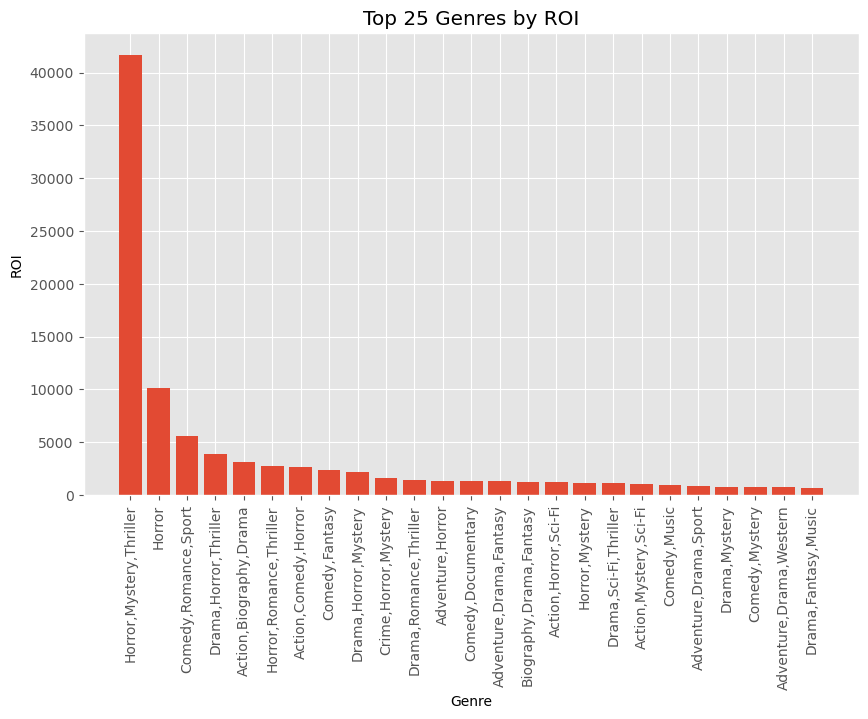

In [202]:
# Set up the plot
plt.figure(figsize=(10, 6))
plt.bar(genre_data['genres'], genre_data['ROI'])
plt.xlabel('Genre')
plt.ylabel('ROI')
plt.title('Top 25 Genres by ROI')
plt.xticks(rotation=90)
plt.show()

Now for Real Profit

In [248]:
# Filter out rows with missing values in 'real_profit' or 'genres'
filtered_data = mov_bas_rat2.dropna(subset=['real_profit', 'genres'])

# Calculate the top 25 genres based on real_profit
top_genres = filtered_data.groupby('genres')['real_profit'].mean().nlargest(25).index.tolist()

# Filter data for top genres
genre_data = filtered_data[filtered_data['genres'].isin(top_genres)]

# Sort genre_data by real_profit in descending order
genre_data = genre_data.sort_values('real_profit', ascending=False)

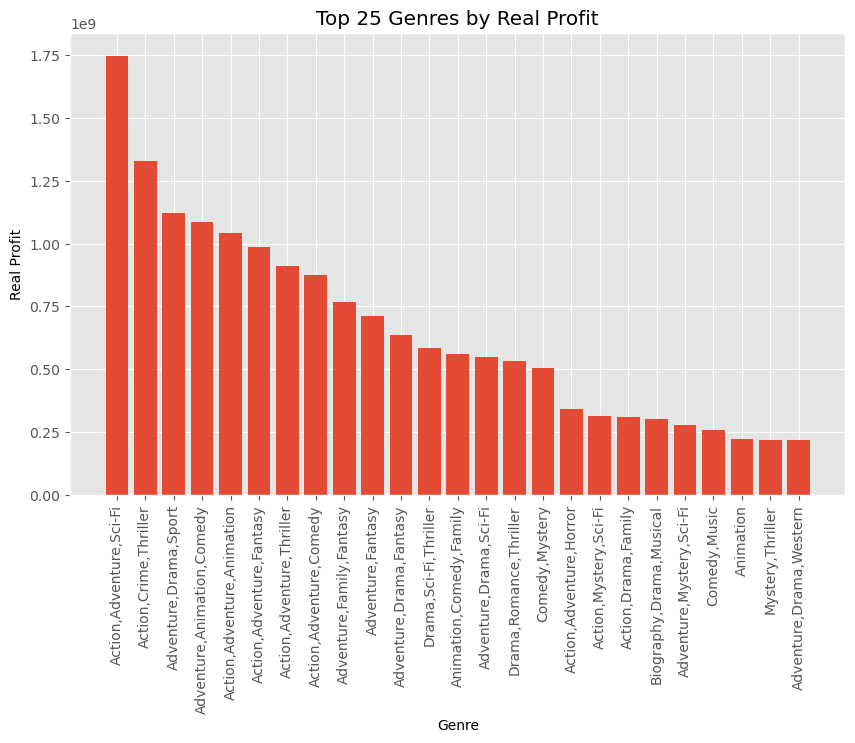

In [250]:
# Set up the plot
plt.figure(figsize=(10, 6))
plt.bar(genre_data['genres'], genre_data['real_profit'])
plt.xlabel('Genre')
plt.ylabel('Real Profit')
plt.title('Top 25 Genres by Real Profit')
plt.xticks(rotation=90)
plt.ylim(bottom=0)  # Set the minimum y-axis value to zero
plt.show()

I want to analize this by single genre, rather than by a combination of genre categories per each film. So let's break it apart.

In [203]:
genre_list2 = mov_bas_rat2['genres'].str.split(',').explode().str.strip().unique().tolist()
print(genre_list2)

['Adventure', 'Drama', 'Romance', 'Comedy', 'Action', 'Crime', 'Sci-Fi', 'Family', 'Animation', 'Thriller', 'Horror', 'Mystery', 'Biography', 'History', 'Fantasy', 'Music', 'Documentary', 'War', 'Sport', 'Western', 'Musical', None]


Let's now explore the relationship between ROI and Genre.

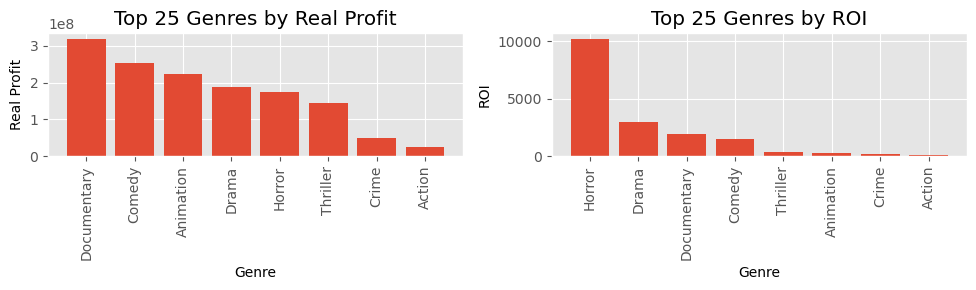

In [251]:
import matplotlib.pyplot as plt

# Filter out rows with missing values in 'real_profit' or 'genres'
filtered_data = mov_bas_rat2.dropna(subset=['real_profit', 'genres'])

# Exclude rows with negative real_profit values
filtered_data = filtered_data[filtered_data['real_profit'] >= 0]

# Calculate the mean REAL_PROFIT for each genre
genre_real_profit = filtered_data.groupby('genres')['real_profit'].mean()

# Filter genre_list2 to include only existing genres
genre_list2_filtered = [genre for genre in genre_list2 if genre in genre_real_profit.index]

# Select the top 25 genres based on real_profit
top_genres_real_profit = genre_real_profit[genre_list2_filtered].nlargest(25).index.tolist()

# Filter data for top genres based on real_profit
genre_data_real_profit = filtered_data[filtered_data['genres'].isin(top_genres_real_profit)]

# Sort genre_data_real_profit by real_profit in descending order
genre_data_real_profit = genre_data_real_profit.sort_values('real_profit', ascending=False)

# Calculate the mean ROI for each genre
genre_roi = filtered_data.groupby('genres')['ROI'].mean()

# Select the top 25 genres based on ROI
top_genres_roi = genre_roi[genre_list2_filtered].nlargest(25).index.tolist()

# Filter data for top genres based on ROI
genre_data_roi = filtered_data[filtered_data['genres'].isin(top_genres_roi)]

# Sort genre_data_roi by ROI in descending order
genre_data_roi = genre_data_roi.sort_values('ROI', ascending=False)

# Set up the subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Plot for Real Profit
axes[0].bar(genre_data_real_profit['genres'], genre_data_real_profit['real_profit'])
axes[0].set_xlabel('Genre')
axes[0].set_ylabel('Real Profit')
axes[0].set_title('Top 25 Genres by Real Profit')
axes[0].tick_params(axis='x', rotation=90)

# Plot for ROI
axes[1].bar(genre_data_roi['genres'], genre_data_roi['ROI'])
axes[1].set_xlabel('Genre')
axes[1].set_ylabel('ROI')
axes[1].set_title('Top 25 Genres by ROI')
axes[1].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


"Horror, Mystery, Thriller" seems like the best genre combination for ROI results. Followed by "Horror"alone. This is a definite thred. 

When simplifying genre clasification to a single subject, "documentary" looks like the best choice for profit, followed by "comedy". But when looking for the ROI criteria, "horror" is, by far the best choice.

In the case of profit, "Action, Adventure, Sci-Fi" is a winner, followed by "Action, Crime, Thriller". This, however, changes when we break it down to single genre categories, making "Documentary" the best choice.  This doesn't mean that documentaries will render the best profit, but it is a good as a "back burner" recommendation.

# The Runtime Factor

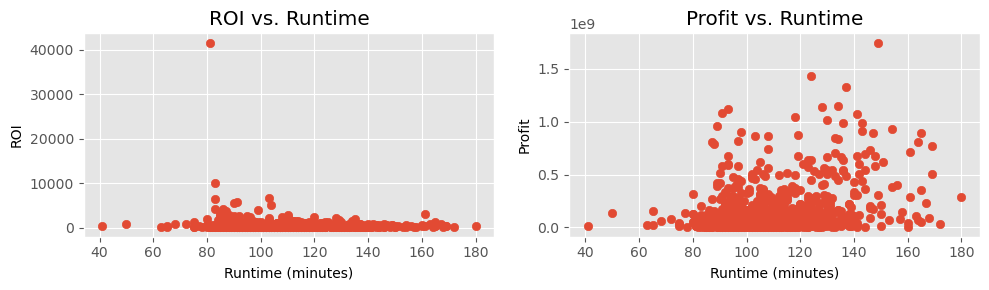

In [205]:
# Filter out rows with missing values in 'runtime_minutes', 'ROI', or 'real_profit'
filtered_data = mov_bas_rat2.dropna(subset=['runtime_minutes', 'ROI', 'real_profit'])

# Exclude rows with negative real_profit values
filtered_data = filtered_data[filtered_data['real_profit'] >= 0]

# Set up the subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Plot for ROI vs. Runtime
axes[0].scatter(filtered_data['runtime_minutes'], filtered_data['ROI'])
axes[0].set_xlabel('Runtime (minutes)')
axes[0].set_ylabel('ROI')
axes[0].set_title('ROI vs. Runtime')

# Plot for Profit vs. Runtime
axes[1].scatter(filtered_data['runtime_minutes'], filtered_data['real_profit'])
axes[1].set_xlabel('Runtime (minutes)')
axes[1].set_ylabel('Profit')
axes[1].set_title('Profit vs. Runtime')

plt.tight_layout()
plt.show()

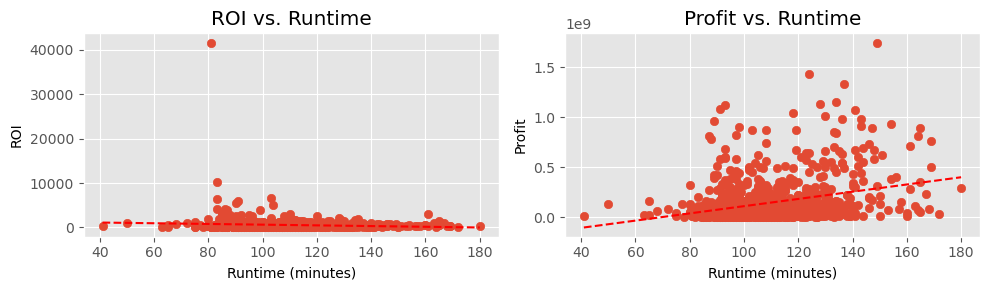

In [206]:
# Filter out rows with missing values in 'runtime_minutes', 'ROI', or 'real_profit'
filtered_data = mov_bas_rat2.dropna(subset=['runtime_minutes', 'ROI', 'real_profit'])

# Exclude rows with negative real_profit values
filtered_data = filtered_data[filtered_data['real_profit'] >= 0]

# Set up the subplot
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

# Plot for ROI vs. Runtime
axes[0].scatter(filtered_data['runtime_minutes'], filtered_data['ROI'])
axes[0].set_xlabel('Runtime (minutes)')
axes[0].set_ylabel('ROI')
axes[0].set_title('ROI vs. Runtime')

# Calculate regression line for ROI vs. Runtime
x_roi = filtered_data['runtime_minutes']
y_roi = filtered_data['ROI']
coefficients_roi = np.polyfit(x_roi, y_roi, 1)
x_roi_line = np.linspace(x_roi.min(), x_roi.max(), 100)
y_roi_line = np.polyval(coefficients_roi, x_roi_line)
axes[0].plot(x_roi_line, y_roi_line, color='red', linestyle='--')

# Plot for Profit vs. Runtime
axes[1].scatter(filtered_data['runtime_minutes'], filtered_data['real_profit'])
axes[1].set_xlabel('Runtime (minutes)')
axes[1].set_ylabel('Profit')
axes[1].set_title('Profit vs. Runtime')

# Calculate regression line for Profit vs. Runtime
x_profit = filtered_data['runtime_minutes']
y_profit = filtered_data['real_profit']
coefficients_profit = np.polyfit(x_profit, y_profit, 1)
x_profit_line = np.linspace(x_profit.min(), x_profit.max(), 100)
y_profit_line = np.polyval(coefficients_profit, x_profit_line)
axes[1].plot(x_profit_line, y_profit_line, color='red', linestyle='--')

plt.tight_layout()
plt.show()


Seems like there isn't much of a correlation between runtime and ROI, but if looking merely at profit, longer movies tend to greater profit. Let's look further into this. 

Let's re-make the ROI vs runtime plot. This time eliminate the top outlier and make the ROI axis measure only up to 7000.

In [207]:
# Calculate the mean, median, and mode of ROI
roi_mean = np.mean(filtered_data['ROI'])
roi_median = np.median(filtered_data['ROI'])
roi_mode = stats.mode(filtered_data['ROI'])[0][0]

# Calculate the mean, median, and mode of runtime
runtime_mean = np.mean(filtered_data['runtime_minutes'])
runtime_median = np.median(filtered_data['runtime_minutes'])
runtime_mode = stats.mode(filtered_data['runtime_minutes'])[0][0]

print("ROI Measures:")
print("Mean:", roi_mean)
print("Median:", roi_median)
print("Mode:", roi_mode)

print("\nRuntime Measures:")
print("Mean:", runtime_mean)
print("Median:", runtime_median)
print("Mode:", runtime_mode)

ROI Measures:
Mean: 546.6924013598704
Median: 310.73605999999995
Mode: 100.02654666666666

Runtime Measures:
Mean: 108.88743169398907
Median: 106.0
Mode: 100.0


C:\Users\rafvr\AppData\Local\Temp\ipykernel_28312\233460037.py:4: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  roi_mode = stats.mode(filtered_data['ROI'])[0][0]
C:\Users\rafvr\AppData\Local\Temp\ipykernel_28312\233460037.py:9: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this w

In [208]:
# Filter out rows with missing values in 'runtime_minutes' or 'ROI'
filtered_data = mov_bas_rat2.dropna(subset=['runtime_minutes', 'ROI'])

# Exclude the top outlier in ROI
filtered_data = filtered_data[filtered_data['ROI'] < filtered_data['ROI'].max()]

# Calculate the mean, median, and mode of ROI
roi_mean = np.mean(filtered_data['ROI'])
roi_median = np.median(filtered_data['ROI'])
roi_mode = stats.mode(filtered_data['ROI'])[0][0]

# Calculate the mean, median, and mode of runtime
runtime_mean = np.mean(filtered_data['runtime_minutes'])
runtime_median = np.median(filtered_data['runtime_minutes'])
runtime_mode = stats.mode(filtered_data['runtime_minutes'])[0][0]

C:\Users\rafvr\AppData\Local\Temp\ipykernel_28312\152243201.py:10: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  roi_mode = stats.mode(filtered_data['ROI'])[0][0]
C:\Users\rafvr\AppData\Local\Temp\ipykernel_28312\152243201.py:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this

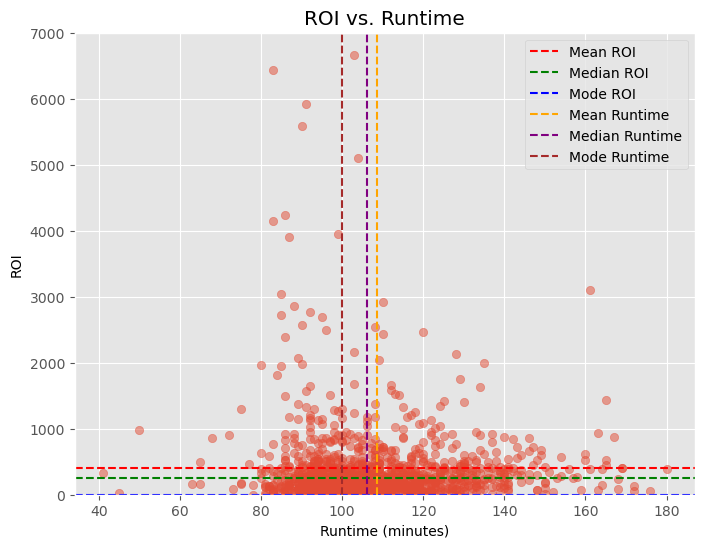

In [209]:
# Set up the plot
plt.figure(figsize=(8, 6))

# Plot ROI vs. runtime
plt.scatter(filtered_data['runtime_minutes'], filtered_data['ROI'], alpha=0.5)
plt.xlabel('Runtime (minutes)')
plt.ylabel('ROI')
plt.title('ROI vs. Runtime')
plt.ylim(0, 7000)

# Plot mean, median, and mode lines for ROI
plt.axhline(roi_mean, color='red', linestyle='--', label='Mean ROI')
plt.axhline(roi_median, color='green', linestyle='--', label='Median ROI')
plt.axhline(roi_mode, color='blue', linestyle='--', label='Mode ROI')

# Plot mean, median, and mode lines for runtime
plt.axvline(runtime_mean, color='orange', linestyle='--', label='Mean Runtime')
plt.axvline(runtime_median, color='purple', linestyle='--', label='Median Runtime')
plt.axvline(runtime_mode, color='brown', linestyle='--', label='Mode Runtime')

plt.legend()

plt.show()

This begs the question: what is, then, the best Runtime for improving our chances to maximize our ROI?

In [210]:
# Define the range of runtime values to analyze
runtime_range = range(0, 200, 10)  # Example: Analyzing 10-minute intervals

In [211]:
# Create an empty DataFrame to store the average ROI and profit for each runtime range
runtime_analysis = pd.DataFrame(columns=['Runtime Range', 'Average ROI', 'Average Profit'])

In [212]:
# Iterate over the runtime ranges
for i in range(len(runtime_range) - 1):
    # Select the movies within the current runtime range
    selected_movies = filtered_data[
        (filtered_data['runtime_minutes'] >= runtime_range[i]) &
        (filtered_data['runtime_minutes'] < runtime_range[i + 1])
    ]

    # Calculate the average ROI and profit for the selected movies
    avg_roi = selected_movies['ROI'].mean()
    avg_profit = selected_movies['real_profit'].mean()

    # Add the runtime range and average ROI/profit to the DataFrame
    runtime_analysis = runtime_analysis.append({
        'Runtime Range': f'{runtime_range[i]}-{runtime_range[i + 1]}',
        'Average ROI': avg_roi,
        'Average Profit': avg_profit
    }, ignore_index=True)

C:\Users\rafvr\AppData\Local\Temp\ipykernel_28312\3987752925.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  runtime_analysis = runtime_analysis.append({
C:\Users\rafvr\AppData\Local\Temp\ipykernel_28312\3987752925.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  runtime_analysis = runtime_analysis.append({
C:\Users\rafvr\AppData\Local\Temp\ipykernel_28312\3987752925.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  runtime_analysis = runtime_analysis.append({
C:\Users\rafvr\AppData\Local\Temp\ipykernel_28312\3987752925.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  runtime_analysis = runtime_analysis.append({
C:\Users

In [213]:
# Sort the DataFrame by average ROI in descending order
runtime_analysis = runtime_analysis.sort_values('Average ROI', ascending=False)

In [214]:
# Print the best runtime range for ROI
best_runtime_roi = runtime_analysis.iloc[0]['Runtime Range']
print(f'Best Runtime Range for ROI: {best_runtime_roi}')

# Sort the DataFrame by average profit in descending order
runtime_analysis = runtime_analysis.sort_values('Average Profit', ascending=False)

# Print the best runtime range for profit
best_runtime_profit = runtime_analysis.iloc[0]['Runtime Range']
print(f'Best Runtime Range for Profit: {best_runtime_profit}')

Best Runtime Range for ROI: 50-60
Best Runtime Range for Profit: 140-150


Now, that is a huge difference. 

In [215]:
# Group the data by average rating and calculate the mean ROI and profit
rating_roi_profit = filtered_data.groupby('averagerating').agg({'ROI': 'mean', 'real_profit': 'mean'}).reset_index()

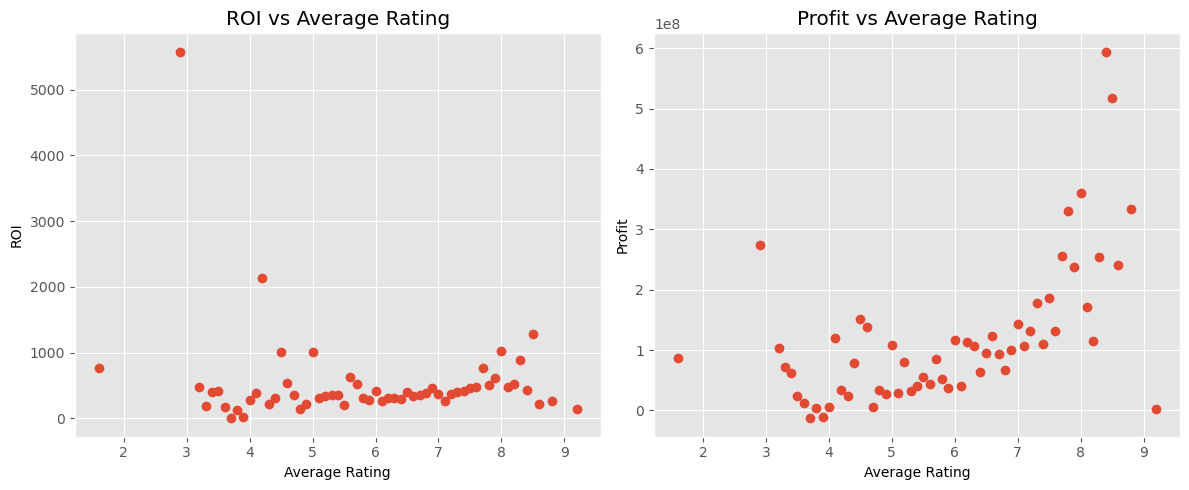

In [253]:
# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot ROI vs average rating
ax1.plot(rating_roi_profit['averagerating'], rating_roi_profit['ROI'], marker='o', linestyle='')
ax1.set_xlabel('Average Rating')
ax1.set_ylabel('ROI')
ax1.set_title('ROI vs Average Rating')

# Plot Profit vs average rating
ax2.plot(rating_roi_profit['averagerating'], rating_roi_profit['real_profit'], marker='o', linestyle='')
ax2.set_xlabel('Average Rating')
ax2.set_ylabel('Profit')
ax2.set_title('Profit vs Average Rating')

# Display the plots
plt.tight_layout()
plt.show()

I am going to attempt a regression to see if we can get a better picture here.

In [217]:
# Perform linear regression for ROI vs average rating
roi_slope, roi_intercept = np.polyfit(rating_roi_profit['averagerating'], rating_roi_profit['ROI'], deg=1)
rating_roi_profit['roi_regression'] = roi_intercept + roi_slope * rating_roi_profit['averagerating']

# Perform linear regression for Profit vs average rating
profit_slope, profit_intercept = np.polyfit(rating_roi_profit['averagerating'], rating_roi_profit['real_profit'], deg=1)
rating_roi_profit['profit_regression'] = profit_intercept + profit_slope * rating_roi_profit['averagerating']

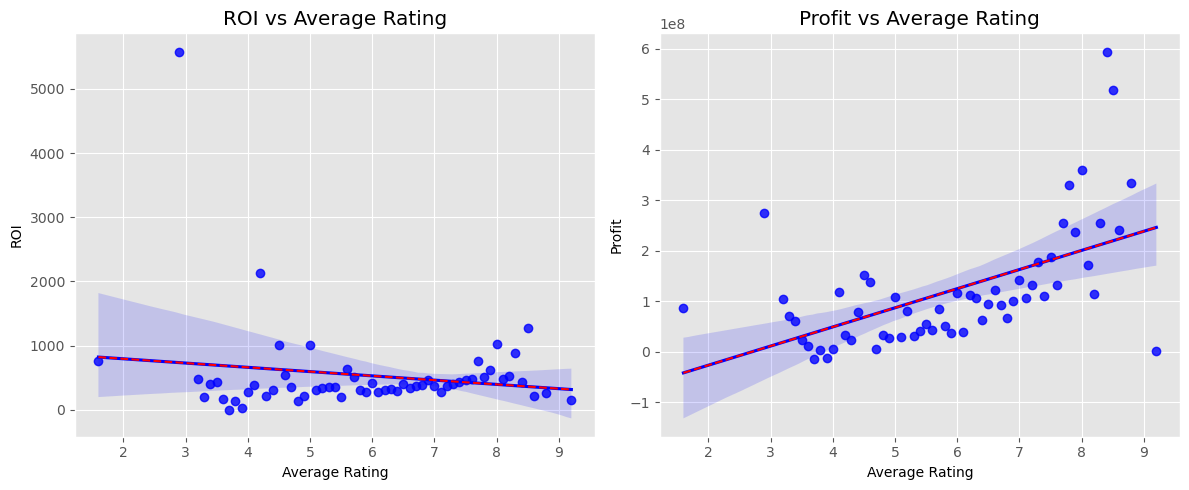

In [218]:
# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot ROI vs average rating with regression line
sns.regplot(x=rating_roi_profit['averagerating'], y=rating_roi_profit['ROI'], ax=ax1, color='b')
ax1.plot(rating_roi_profit['averagerating'], rating_roi_profit['roi_regression'], color='r', linestyle='--')
ax1.set_xlabel('Average Rating')
ax1.set_ylabel('ROI')
ax1.set_title('ROI vs Average Rating')

# Plot Profit vs average rating with regression line
sns.regplot(x=rating_roi_profit['averagerating'], y=rating_roi_profit['real_profit'], ax=ax2, color='b')
ax2.plot(rating_roi_profit['averagerating'], rating_roi_profit['profit_regression'], color='r', linestyle='--')
ax2.set_xlabel('Average Rating')
ax2.set_ylabel('Profit')
ax2.set_title('Profit vs Average Rating')

# Display the plots
plt.tight_layout()
plt.show()

Why is the correlation between ROI and Average Rating negative? Might be because of an unlucky outlier - one single film got a low average rating but produced a high ROI. The correlation between Profit and Average Rating is clearly positive: the more people like a film the greater the profit it should generate. 

We have another meter to measure this: number of votes. It tells us how popular a film is. Regardless of how people vote on the movie, a greater number of votes means a greater number of views, since people vote on a film they've watched.  

In [219]:
# Group the data by number of votes and calculate the mean ROI and profit
votes_roi_profit = filtered_data.groupby('numvotes').agg({'ROI': 'mean', 'real_profit': 'mean'}).reset_index()

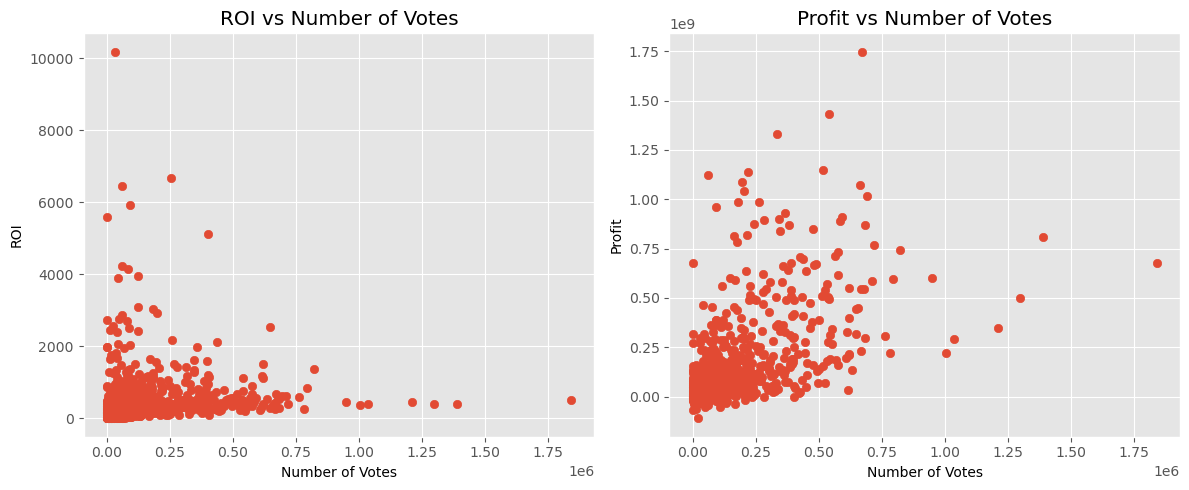

In [252]:
# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot number of votes vs ROI
ax1.scatter(votes_roi_profit['numvotes'], votes_roi_profit['ROI'])
ax1.set_xlabel('Number of Votes')
ax1.set_ylabel('ROI')
ax1.set_title('ROI vs Number of Votes')

# Plot number of votes vs profit
ax2.scatter(votes_roi_profit['numvotes'], votes_roi_profit['real_profit'])
ax2.set_xlabel('Number of Votes')
ax2.set_ylabel('Profit')
ax2.set_title('Profit vs Number of Votes')

# Display the plots
plt.tight_layout()
plt.show()

In [221]:
# Perform linear regression for number of votes vs ROI
roi_slope, roi_intercept = np.polyfit(votes_roi_profit['numvotes'], votes_roi_profit['ROI'], deg=1)
votes_roi_profit['roi_regression'] = roi_intercept + roi_slope * votes_roi_profit['numvotes']

# Perform linear regression for number of votes vs profit
profit_slope, profit_intercept = np.polyfit(votes_roi_profit['numvotes'], votes_roi_profit['real_profit'], deg=1)
votes_roi_profit['profit_regression'] = profit_intercept + profit_slope * votes_roi_profit['numvotes']

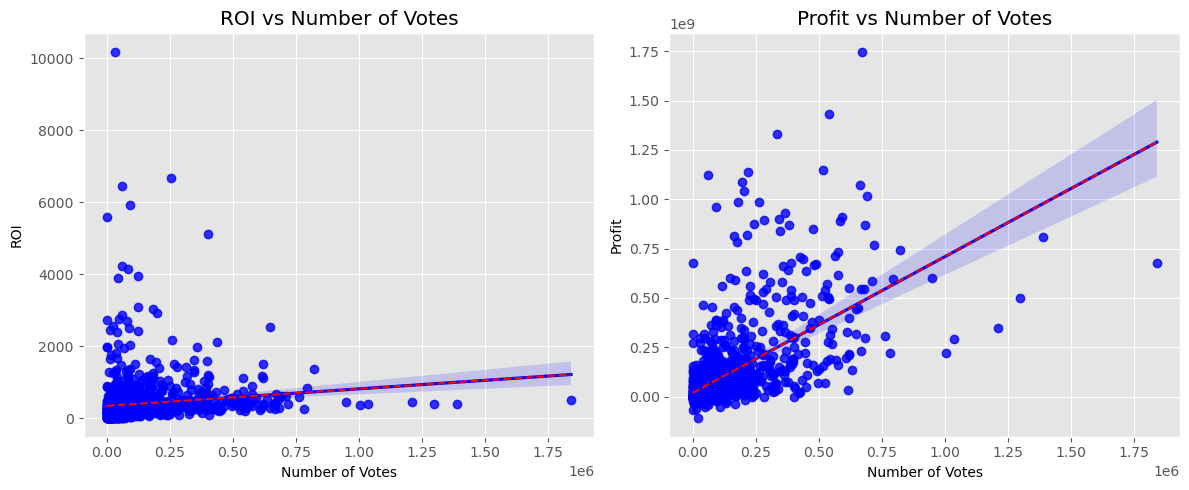

In [141]:
# Set up the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot number of votes vs ROI with regression line
sns.regplot(x=votes_roi_profit['numvotes'], y=votes_roi_profit['ROI'], ax=ax1, color='b')
ax1.plot(votes_roi_profit['numvotes'], votes_roi_profit['roi_regression'], color='r', linestyle='--')
ax1.set_xlabel('Number of Votes')
ax1.set_ylabel('ROI')
ax1.set_title('ROI vs Number of Votes')

# Plot number of votes vs profit with regression line
sns.regplot(x=votes_roi_profit['numvotes'], y=votes_roi_profit['real_profit'], ax=ax2, color='b')
ax2.plot(votes_roi_profit['numvotes'], votes_roi_profit['profit_regression'], color='r', linestyle='--')
ax2.set_xlabel('Number of Votes')
ax2.set_ylabel('Profit')
ax2.set_title('Profit vs Number of Votes')

# Display the plots
plt.tight_layout()
plt.show()

Looks like the correlation is positive, but much more acute when it comes to profit that in the case of ROI. This is not caused by an outlier.  Seems like ROI does not improve so significantly with the popularity of the film, even though profit clearly does.

# Conclusions

In conclusion, it is evident that ROI and Profit are distinct metrics and should be evaluated separately. While they often cluster around zero, their trends diverge in many instances, emphasizing the need for individual assessment.

The combination of "Horror, Mystery, Thriller" emerges as the most favorable genre combination for ROI results, followed closely by "Horror" alone. This pattern indicates a consistent trend worth considering.

For optimal ROI, films with a runtime of 50-60 minutes tend to perform best, whereas a runtime range of 140-150 minutes appears to yield higher profits. These findings provide valuable insights into runtime considerations for different financial objectives.

When examining single-genre classifications, "Documentary" emerges as the preferred choice for profit, closely followed by "Comedy." However, for maximizing ROI, "Horror" stands out as the clear frontrunner. It is important to note that while "Documentary" is recommended for profit, it should be regarded as a secondary suggestion rather than a guaranteed high-profit genre.

In terms of profit, "Action, Adventure, Sci-Fi" takes the lead, followed by "Action, Crime, Thriller." However, the scenario changes when analyzing single-genre categories, with "Documentary" emerging as the top choice. This indicates that while documentaries may not generate the highest profits, they can be considered a viable option for supplementary content.

The data shows a positive correlation between film popularity and profit, with profit exhibiting a more pronounced sensitivity to popularity compared to ROI. This correlation is not influenced by outliers, indicating that the relationship holds consistently across the dataset. Interestingly, while profit shows a significant improvement with increasing popularity, the same level of enhancement is not observed for ROI.

It is important to remember that these conclusions are based on the available data and should be considered within the context of the specific analysis. The following section will provide recommendations based on these findings.

# Recommendations

Based on the analysis conducted, the following recommendations can be made:

<b>ROI Assessment:</b> When evaluating the return on investment, it is advisable to focus on films belonging to the "Horror, Mystery, Thriller" genre combination, as they tend to yield favorable results. Additionally, standalone "Horror" films also show promise. Allocating resources and efforts towards producing and promoting films in these genres can potentially lead to higher returns.

<b>Runtime Considerations:</b> For films aiming to maximize ROI, it is recommended to target a runtime range of 50-60 minutes. This duration has shown a positive association with better ROI outcomes. Conversely, for films aiming to generate higher profits, a runtime range of 140-150 minutes is suggested. Striking the right balance between runtime and financial objectives can contribute to the overall success of a film.

<b>Genre Selection for Profit:</b> When prioritizing profit generation, focusing on the "Documentary" genre as the primary choice can be beneficial. It is closely followed by the "Comedy" genre. However, keep in mind that "Horror" remains the top choice for maximizing ROI. Considering a mix of genres or experimenting with genre combinations can help diversify the film portfolio and cater to different financial goals.

<b>Profitable Combined-Genre Categories:</b> Although the overall recommendation favors the "Documentary" genre, exploring other combined-genre categories is still important. For films aiming to maximize profit, a combination of genres such as "Action, Adventure, Sci-Fi" and "Action, Crime, Thriller" have demonstrated potential. Evaluating market demand and audience preferences within these genres can guide decision-making regarding project selection and resource allocation.

On the other hand, if the board of directors prioritizes ROI as the primary objective, the following recommendations are suggested:

<b>ROI Assessment:</b> Give priority to genres that have shown favorable ROI results, such as "Horror, Mystery, Thriller" and standalone "Horror" films. These genres have consistently yielded positive returns on investment and are likely to continue doing so.

<b>Optimal Runtime Range for ROI:</b> Target a runtime range of 50-60 minutes for films aiming to maximize ROI. This duration has shown a positive correlation with better ROI outcomes and can contribute to the financial success of the projects.

## Additional Recommendation:

<b>Popularity and Profit:</b> Invest in robust marketing and promotional strategies to enhance the visibility and popularity of films. Utilize social media platforms, collaborate with influencers, and implement targeted advertising campaigns to maximize profit potential. By increasing a film's popularity, its profitability can also be significantly enhanced.

Documentary films can be a viable option for both profit and ROI, making it a potential "back burner" recommendation.

It is important to note that these recommendations are based on the findings derived from the analysis conducted. The choice between prioritizing profit or ROI depends on the specific goals and objectives set by the board of directors. Adjustments and adaptations may be necessary based on changing market dynamics.

# Next Steps